In [1]:
# Reference for building Logistic Regression model: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd

In [39]:
# Please update the path to the activities.csv file from the repository
df = pd.read_csv('/Users/sparsons/Downloads/DataMiningProject-master 2/activities.csv')

In [40]:
df.head()

,Date,Name,Type,Moving Time,Distance (km),Elevation Gain (m),Avg Moving Speed (kph),Avg Pace (/km),Calories,Best 20min Speed (kph),Best 20min Pace (/km),Running Stress Score,Running Stress Score / h,Avg HR (bpm),HRSS,HRSS / h,Best 20min HR (bpm),Cadence Avg Moving (rpm or spm),Avg Watts (w),Avg Watts / Kilograms (w/kg),Best 20min Power (w),Power Stress Score,Power Stress Score / h,Athlete Settings,Delete
0,2019-09-22T16:27:01-04:00,Último día de verano,Ride,01:58:06,62.5,589.0,31.7,01:53,1772,34,01:45,-,-,158,144,73,163,95,179,2.56,201,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
1,2019-09-21T11:57:23-04:00,Dos loops,Ride,02:38:51,80.1,890.0,28.7,02:05,2432,36.7,01:38,-,-,158,217,77,173,89,174,2.49,225,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
2,2019-09-20T17:55:47-04:00,Con poco tiempo,Ride,01:07:52,35.2,314.0,30.9,01:56,1029,34.5,01:44,-,-,159,87,76,163,91,169,2.42,188,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
3,2019-09-19T23:45:00-04:00,Complimentary calisthenics,Workout,01:00:00,0.0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Weight 70kg.,NaN
4,2019-09-18T17:41:48-04:00,Afternoon Ride,Ride,01:26:05,45.6,447.0,31.4,01:54,1326,36,01:40,-,-,161,119,81,173,97,181,2.59,221,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN


In [41]:
# Before feature pre-processing
df.describe()

,Distance (km),Elevation Gain (m),Delete
count,573.000000,573.000000,0.0
mean,35.888656,620.718325,NaN
std,29.855291,601.756726,NaN
min,0.000000,0.000000,NaN
25%,9.300000,189.400000,NaN
50%,32.900000,526.000000,NaN
75%,51.900000,884.600000,NaN
max,170.600000,3617.000000,NaN


In [42]:
# Select features and rename columns
df = df[['Avg HR (bpm)','Date','Type','Distance (km)','Avg Pace (/km)','Calories','HRSS','Elevation Gain (m)']]
df = df.rename(columns={"Avg HR (bpm)": "AvgHR"})
df.head()

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
0,158,2019-09-22T16:27:01-04:00,Ride,62.5,01:53,1772,144,589.0
1,158,2019-09-21T11:57:23-04:00,Ride,80.1,02:05,2432,217,890.0
2,159,2019-09-20T17:55:47-04:00,Ride,35.2,01:56,1029,87,314.0
3,-,2019-09-19T23:45:00-04:00,Workout,0.0,-,-,-,0.0
4,161,2019-09-18T17:41:48-04:00,Ride,45.6,01:54,1326,119,447.0


In [43]:
# Define features and pre-process data for final dataset
from dateutil.parser import parse
# Filter rows to include only those with AvgHR
df = df[df.AvgHR != '-']
# Only include Ride and VirtualRide types
types = ['Ride', 'VirtualRide']
df = df[df.Type.isin(types)]

df = df.reset_index(drop=True)
# Convert features to numbers
df["AvgHR"] = pd.to_numeric(df["AvgHR"])
df["Calories"] = pd.to_numeric(df["Calories"])
df["HRSS"] = pd.to_numeric(df["HRSS"])
df.head()
# Convert Avg Pace to seconds, parse Date and Time as separate columns
for i in range(df.shape[0]):
    #print('done')
    #print(df.loc[i,'Avg Pace (/km)'])
    (m, s) = str(df.loc[i,'Avg Pace (/km)']).split(':')
    df.loc[i,'Avg Pace (/km)']= (int(m) * 60) + int(s)
    dt = parse(df.loc[i,'Date'])
    df.loc[i,'Date'] = dt.date()
    df.loc[i,'Time'] = dt.time()
# Convert Avg Pace to number
df['Avg Pace (/km)'] = pd.to_numeric(df['Avg Pace (/km)'])

df.describe()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,155.032362,52.237540,150.624595,1573.423948,152.022654,888.765372
std,12.505282,27.117491,42.469105,848.025054,82.021593,650.796847
min,84.000000,1.400000,86.000000,48.000000,3.000000,0.000000
25%,149.000000,32.900000,119.000000,979.000000,98.000000,492.000000
50%,155.000000,50.100000,151.000000,1354.000000,128.000000,715.000000
75%,161.000000,60.400000,168.000000,1827.000000,187.000000,1128.900000
max,191.000000,170.600000,477.000000,5415.000000,471.000000,3617.000000


In [44]:
df.groupby(['Type']).mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
Type,,,,,,
Ride,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831
VirtualRide,165.500000,30.450000,115.357143,691.142857,86.714286,394.757143


In [45]:
df.groupby(['Type']).describe()

AvgHR                                                       \
             count        mean        std    min     25%    50%     75%   
Type                                                                      
Ride         295.0  154.535593  12.103490   84.0  149.00  155.0  160.50   
VirtualRide   14.0  165.500000  16.383622  135.0  156.75  163.0  175.75   

                   Distance (km)                                           \
               max         count       mean        std  min    25%    50%   
Type                                                                        
Ride         191.0         295.0  53.271525  27.276345  1.4  33.25  50.40   
VirtualRide  191.0          14.0  30.450000   7.812785  8.1  28.40  30.15   

                          Avg Pace (/km)                                      \
               75%    max          count        mean       std   min     25%   
Type                                                                           
Ride         61.15  170.6          295.0  152.298305  42.64518  86.0  119.50   
VirtualRide  34.60   41.1           14.0  115.357143  14.15631  98.0  104.75   

                                 Calories                                  \
               50%    75%    max    count         mean         std    min   
Type                                                                        
Ride         152.0  169.0  477.0    295.0  1615.294915  844.898853   48.0   
VirtualRide  110.5  123.0  146.0     14.0   691.142857  126.781373  475.0   

                                               HRSS                         \
                 25%     50%     75%     max  count        mean        std   
Type                                                                         
Ride         1012.00  1395.0  1873.0  5415.0  295.0  155.122034  82.494477   
VirtualRide   644.25   678.5   727.0  1016.0   14.0   86.714286  25.968705   

                                             Elevation Gain (m)              \
              min   25%    50%    75%    max              count        mean   
Type                                                                          
Ride          3.0  99.5  134.0  189.5  471.0              295.0  912.209831   
VirtualRide  43.0  75.0   91.5   94.0  127.0               14.0  394.757143   

                                                               
                    std    min    25%    50%      75%     max  
Type                                                           
Ride         656.472151    0.0  512.0  743.0  1131.85  3617.0  
VirtualRide  114.192663  230.6  301.0  368.5   500.00   558.0

In [46]:
# Create binary labels for High 'AvgHR' (1) and Low 'AvgHR' (0) based on threshold of 154 bpm
for j in range(df.shape[0]):
    if int(df.loc[j,'AvgHR']) > 154:
        #print(df.loc[j,'AvgHR'])
        df.loc[j,'AvgHR_bin'] = 1
    else: 
        df.loc[j,'AvgHR_bin'] = 0

In [47]:
df

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
5,155,2019-09-15,Ride,61.4,122,1806,146,692.0,12:00:04,1.0
6,158,2019-09-14,Ride,81.0,129,2550,225,1096.0,12:30:04,1.0
7,142,2019-09-13,Ride,51.4,128,1289,90,576.0,10:32:05,0.0
8,153,2019-09-11,Ride,55.4,114,1479,116,502.0,17:55:23,0.0
9,154,2019-09-10,Ride,47.2,116,1288,106,447.0,18:37:38,0.0


In [48]:
df.groupby('AvgHR_bin').mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
AvgHR_bin,,,,,,
0.0,145.794521,55.214384,167.794521,1644.650685,145.445205,1048.490411
1.0,163.306748,49.571166,135.245399,1509.625767,157.914110,745.698773


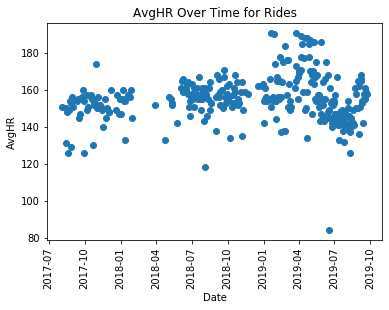

In [49]:
# Plot AvgHR over time for all virtual and outdoor bike rides
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot_date(df['Date'],df['AvgHR'])
plt.title('AvgHR Over Time for Rides')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AvgHR')
plt.show()

In [50]:
# Calculate sample size of each class
count_no_sub = len(df[df['AvgHR_bin']==1])
count_sub = len(df[df['AvgHR_bin']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of High AvgHR is", '%.2f' %(pct_of_no_sub*100))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Low AvgHR is", '%.2f' %(pct_of_sub*100))

percentage of High AvgHR is 52.75
percentage of Low AvgHR is 47.25


Text(0, 0.5, 'Frequency of Average HR')

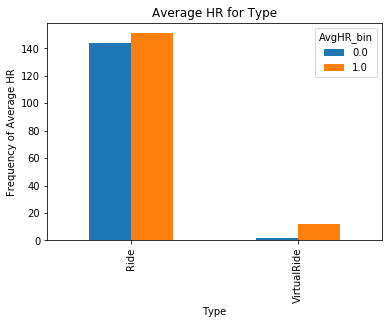

In [51]:
# Plot distribution of AvgHR for Rides and VirtualRides
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Type,df.AvgHR_bin).plot(kind='bar')
plt.title('Average HR for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Average HR')
#plt.savefig('purchase_avghr_type')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
# Define train and test set, perform RFE
window_size = 294
# removed Calories as feature since p-value was 0.07 > 0.05 (from below Logit function), as recommended
df_vars = ['Distance (km)', 'Avg Pace (/km)', 'HRSS', 'Elevation Gain (m)','AvgHR_bin']
df_final = df[df_vars]
df_final_vars=df_final.columns.values.tolist()
y=df_final.AvgHR_bin
X=[i for i in df_final_vars if i not in y]

X = df_final.loc[:, df_final.columns != 'AvgHR_bin']
y = df_final.loc[:, df_final.columns == 'AvgHR_bin']

# Configure train and test sets
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]

X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print(X_test, y_test)

# Perform RFE (recursive feature elimination) to determine ranking of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

     Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0             62.5             113   144               589.0
1             80.1             125   217               890.0
2             35.2             116    87               314.0
3             45.6             114   119               447.0
4             41.1             120    96               454.0
5             61.4             122   146               692.0
6             81.0             129   225              1096.0
7             51.4             128    90               576.0
8             55.4             114   116               502.0
9             47.2             116   106               447.0
10            52.6             122   172               535.0
11           100.9             130   337              1395.0
12            52.0             116   152               560.0
13            13.2             301    74               184.0
14            30.3             127    92               550.0
15            45.9      

[ True  True  True  True]
[1 1 1 1]


In [54]:
# Implement Logit model to determine p-values and coefficients for each feature
import statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307462
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.555     
Dependent Variable:  AvgHR_bin        AIC:              198.0117  
Date:                2019-11-17 19:34 BIC:              212.9451  
No. Observations:    309              Log-Likelihood:   -95.006   
Df Model:            3                LL-Null:          -213.71   
Df Residuals:        305              LLR p-value:      3.4432e-51
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Distance (km)      -0.1857   0.0271 -6.8416 0.0000 -0.2389 -0.1325
Avg Pace (/km)     -0.0120   0.0029 -4.1900 0.0000 -0

In [55]:
# Iterate over all window sizes to determine optimal size
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change window_size_optimization flag to perform iterations
window_size_optimization = False

if window_size_optimization == True:

    logreg = LogisticRegression()
    accuracies = np.zeros(298)

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,299):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # print('X train shape: ', X_train.shape[0])
            # print('X train: ', X_train.head())
            logreg.fit(X_train, y_train.values.ravel())
            # Predict test set
            # print('X test: ', X_test.iloc[0])
            y_pred = logreg.predict(np.array(X_test.iloc[0]).reshape(1,-1))
            # print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
            preds[i] = y_pred
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
            # print('new X train: ', X_train.head())
            X_train = X_train.append(X_test.iloc[0])
            X_train = X_train.reset_index(drop=True)
            y_train = y_train.append(y_test.iloc[0])
            y_train = y_train.reset_index(drop=True)
            X_test = X_test.drop(X_test.index[0])
            X_test = X_test.reset_index(drop=True)
            y_test = y_test.drop(y_test.index[0])
            y_test = y_test.reset_index(drop=True)
            #print(X_test)
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df.join(actuals)
        # print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('accuracy for window size {}: {}'.format(309-window_size, accuracy))
        accuracies[window_size-1] = accuracy
    print('Accuracies: ', accuracies)
    # Output accuracies for each window size to Accuracies_for_Window_Size_Variations.csv file 
    with open('Accuracies_for_Window_Size_Variations.csv', 'w') as f:
        for i in range(0,len(accuracies)):
            f.write(str(308-i) + ': ' + str(accuracies[i]))
            f.write('\n')

In [56]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('Accuracies_for_Window_Size_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

    Window             Accuracy
0      308                  1.0
2      306                  1.0
3      305                  1.0
1      307                  1.0
139    169   0.9357142857142857
138    170    0.935251798561151
137    171   0.9347826086956522
136    172   0.9343065693430657
135    173   0.9338235294117647
134    174   0.9333333333333333
133    175   0.9328358208955224
132    176   0.9323308270676691
131    177   0.9318181818181818
130    178   0.9312977099236641
129    179   0.9307692307692308
128    180   0.9302325581395349
127    181            0.9296875
126    182   0.9291338582677166
140    168   0.9290780141843972
125    183   0.9285714285714286
152    156   0.9281045751633987
150    158   0.9271523178807947
149    159   0.9266666666666666
148    160   0.9261744966442953
147    161   0.9256756756756757
146    162   0.9251700680272109
145    163   0.9246575342465754
144    164   0.9241379310344827
143    165   0.9236111111111112
142    166   0.9230769230769231
116    1

In [57]:
# Run LR with optimal window size of 15 (# predictions = 294)
window_size = 294
print('# Predictions: ', window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

actuals = pd.DataFrame(y_test)
actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
# print('actuals: \n', actuals)
preds = np.zeros(X_test.shape[0])
# print('X_test: \n', X_test)
for i in range(0,y_test.shape[0]):
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    logreg.fit(X_train, y_train.values.ravel())
    # Predict test set
    y_pred = logreg.predict(np.array(X_test.iloc[0]).reshape(1,-1))
    print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
    preds[i] = y_pred
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    X_train = X_train.append(X_test.iloc[0])
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.append(y_test.iloc[0])
    y_train = y_train.reset_index(drop=True)
    
    X_test = X_test.drop(X_test.index[0])
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.drop(y_test.index[0])
    y_test = y_test.reset_index(drop=True)

preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
preds_act_df = preds_act_df.join(actuals)
print('actuals and preds: \n', preds_act_df)
accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
print('accuracy for window size {}: {}'.format(window_size, accuracy))

# Predictions:  294
train labels:       AvgHR_bin
294        0.0
295        1.0
296        0.0
297        0.0
298        1.0
299        0.0
300        0.0
301        0.0
302        0.0
303        0.0
304        0.0
305        0.0
306        0.0
307        0.0
308        0.0
test labels:       AvgHR_bin
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          0.0
8          0.0
9          0.0
10         1.0
11         1.0
12         1.0
13         0.0
14         1.0
15         0.0
16         0.0
17         1.0
18         0.0
19         1.0
20         1.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34         0.0
35         0.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
41         0.0
42         0.0
43         0.0
44         0.0
45         0.0
46    

Iteration:  43
X train shape:  58
X test shape:  251
actual:  0.0 
 pred:  [0.] 

Iteration:  44
X train shape:  59
X test shape:  250
actual:  0.0 
 pred:  [0.] 

Iteration:  45
X train shape:  60
X test shape:  249
actual:  0.0 
 pred:  [0.] 

Iteration:  46
X train shape:  61
X test shape:  248
actual:  0.0 
 pred:  [0.] 

Iteration:  47
X train shape:  62
X test shape:  247
actual:  0.0 
 pred:  [0.] 

Iteration:  48
X train shape:  63
X test shape:  246
actual:  0.0 
 pred:  [0.] 

Iteration:  49
X train shape:  64
X test shape:  245
actual:  0.0 
 pred:  [0.] 

Iteration:  50
X train shape:  65
X test shape:  244
actual:  0.0 
 pred:  [0.] 

Iteration:  51
X train shape:  66
X test shape:  243
actual:  0.0 
 pred:  [0.] 

Iteration:  52
X train shape:  67
X test shape:  242
actual:  1.0 
 pred:  [1.] 

Iteration:  53
X train shape:  68
X test shape:  241
actual:  1.0 
 pred:  [0.] 

Iteration:  54
X train shape:  69
X test shape:  240
actual:  0.0 
 pred:  [0.] 

Iteration:  55
X

actual:  0.0 
 pred:  [0.] 

Iteration:  143
X train shape:  158
X test shape:  151
actual:  1.0 
 pred:  [1.] 

Iteration:  144
X train shape:  159
X test shape:  150
actual:  1.0 
 pred:  [1.] 

Iteration:  145
X train shape:  160
X test shape:  149
actual:  0.0 
 pred:  [0.] 

Iteration:  146
X train shape:  161
X test shape:  148
actual:  1.0 
 pred:  [1.] 

Iteration:  147
X train shape:  162
X test shape:  147
actual:  1.0 
 pred:  [1.] 

Iteration:  148
X train shape:  163
X test shape:  146
actual:  1.0 
 pred:  [1.] 

Iteration:  149
X train shape:  164
X test shape:  145
actual:  1.0 
 pred:  [1.] 

Iteration:  150
X train shape:  165
X test shape:  144
actual:  1.0 
 pred:  [1.] 

Iteration:  151
X train shape:  166
X test shape:  143
actual:  0.0 
 pred:  [1.] 

Iteration:  152
X train shape:  167
X test shape:  142
actual:  0.0 
 pred:  [0.] 

Iteration:  153
X train shape:  168
X test shape:  141
actual:  1.0 
 pred:  [1.] 

Iteration:  154
X train shape:  169
X test shap

Iteration:  242
X train shape:  257
X test shape:  52
actual:  0.0 
 pred:  [0.] 

Iteration:  243
X train shape:  258
X test shape:  51
actual:  1.0 
 pred:  [1.] 

Iteration:  244
X train shape:  259
X test shape:  50
actual:  0.0 
 pred:  [1.] 

Iteration:  245
X train shape:  260
X test shape:  49
actual:  0.0 
 pred:  [1.] 

Iteration:  246
X train shape:  261
X test shape:  48
actual:  1.0 
 pred:  [0.] 

Iteration:  247
X train shape:  262
X test shape:  47
actual:  1.0 
 pred:  [1.] 

Iteration:  248
X train shape:  263
X test shape:  46
actual:  0.0 
 pred:  [0.] 

Iteration:  249
X train shape:  264
X test shape:  45
actual:  0.0 
 pred:  [1.] 

Iteration:  250
X train shape:  265
X test shape:  44
actual:  0.0 
 pred:  [0.] 

Iteration:  251
X train shape:  266
X test shape:  43
actual:  1.0 
 pred:  [1.] 

Iteration:  252
X train shape:  267
X test shape:  42
actual:  1.0 
 pred:  [1.] 

Iteration:  253
X train shape:  268
X test shape:  41
actual:  1.0 
 pred:  [1.] 

Iter

In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(actuals, preds)
print(confusion_matrix1)

[[120  13]
 [ 21 140]]


In [59]:
tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()
print('true neg: ', tn, '\nfalse pos: ', fp, '\nfalse neg: ', fn, '\ntrue pos: ',tp)

true neg:  120 
false pos:  13 
false neg:  21 
true pos:  140


In [60]:
# Precision, recall, f1-score, support (# of test instances per class)
from sklearn.metrics import classification_report
print(classification_report(actuals, preds))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       133
         1.0       0.92      0.87      0.89       161

    accuracy                           0.88       294
   macro avg       0.88      0.89      0.88       294
weighted avg       0.89      0.88      0.88       294



In [61]:
# ROC curve
'''
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))
fpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
'''

'\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))\nfpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()\n'